In [1]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal

#Author : TAN LAY YAN WIF160058

In [2]:
# Just to view the graph
def plot_graph():
    # length_of_queue = queue
    # availability_of_doctor = availability
    # estimation_time = time (in min)
    graph_name = ['queue','availability','time']
    queue_name = ['short','moderate', 'long']
    availability_name = ['busy','moderate', 'free']
    time_name = ['short','moderate', 'long']
    label_arr = [queue_name,availability_name,time_name]
    input_point = [0,5,10]
    output_point = [0,30,60]

    for i in range(3):
        plt.figure(graph_name[i])
        plt.xlabel(graph_name[i])

        if i == 2:
            x = output_point
        else:
            x = input_point

        for j in range(3):
            if j == 0:
                y = [1,0,0]
            elif j == 1:
                y = [0,1,0]
            else:
                y = [0,0,1]

            label = label_arr[i][j]
            plt.plot(x, y, label = label)
        plt.legend(loc = 'center')    
        plt.ylim(bottom=0)
        plt.xlim(left=0)
        pass


In [3]:
rules_list = []
def createRule(var1, op, var2, out):
    rules_list.append((var1, op, var2, out))
    pass

In [4]:
def define_rules():
    createRule(('queue', 'short'), 'AND',('availability','free'), ('time','short'))
    createRule(('queue', 'short'), 'AND', ('availability','moderate'), ('time','short'))
    createRule(('queue', 'short'), 'AND', ('availability','busy'), ('time','short'))
    createRule(('queue', 'moderate'), 'AND', ('availability','free'), ('time','short'))
    createRule(('queue', 'moderate'), 'AND', ('availability','moderate'), ('time','moderate'))
    createRule(('queue', 'moderate'), 'AND', ('availability','busy'),  ('time','long'))
    createRule(('queue', 'long'), 'AND', ('availability','free'),  ('time','moderate'))
    createRule(('queue', 'long'), 'AND', ('availability','moderate'),('time','long'))
    createRule(('queue', 'long'), 'AND', ('availability','busy'), ('time','long'))

In [5]:
def get_line_equation(p1,p2):
    # p=(x,y)
    m=Decimal((p2[1]-p1[1])) / Decimal(p2[0]-p1[0])
    c=(p2[1]-(m*p2[0]))
    return m,c

In [6]:
# Calculate the firing value for each rule
def calculate(queue_input, availability_input):
    fire_list_queue = get_firing_strengh(queue_input,'queue')
    fire_list_availability = get_firing_strengh(availability_input,'availability')
    
#     Testing
    print("\nFiring strength for queue membership :\n",fire_list_queue)
    print("\nFiring strength for availability :\n", fire_list_availability)
    
    fired_value_list = []
    
# Calculate the firing value for each value (by looking at AND or OR)
    for i in range(len(rules_list)):
#         Queue condition
        if rules_list[i][0][1] == 'short':
            v1 = fire_list_queue[0][2]
        elif rules_list[i][0][1] == 'moderate':
            v1 = fire_list_queue[1][2]
        elif rules_list[i][0][1] == 'long':
            v1 = fire_list_queue[2][2]
            
#         Availability condition
        if rules_list[i][2][1] == 'busy':
            v2 = fire_list_availability[0][2]
        elif rules_list[i][2][1] == 'moderate':
            v2 = fire_list_availability[1][2]
        elif rules_list[i][2][1] == 'free':
            v2 = fire_list_availability[2][2]

#         Checking operation
        if rules_list[i][1] == 'AND':
            firing_value = v1 if v2 > v1 else v2
        else:
            firing_value = v2 if v2 > v1 else v1
        
        fired_value_list.append((rules_list[i][3][0],rules_list[i][3][1],firing_value))
        
#     Testing
    print("\nFiring value for each rules:\n ",fired_value_list)
    
    return defuzzification(fired_value_list)

In [7]:
# Get Firing Streng for Each Membership
# eg. get_firing_strengh(queue_input,'queue')
#     get_firing_strengh(availability_input,'availability')
def get_firing_strengh(input_value,label):
    firing_list = []
    fuzzy_set_list = []
    
#     Condition for fuzzy_set_list
    if label == 'queue':
        fuzzy_set_list = ['short','moderate', 'long']
        
    elif label == 'availability':
        fuzzy_set_list = ['busy','moderate', 'free']
    
#     Get the intersection Point of the input value in the graph
#     By first determine the graph gradient of the membership function
#     Condition for calcuting each fuzzy set firing strengh

    if input_value <= 0:
        # queue short / availability busy
        firing_list.append((label, fuzzy_set_list[0], 1))
        firing_list.append((label, fuzzy_set_list[1], 0))
        firing_list.append((label, fuzzy_set_list[2], 0))
        
    elif 0 < input_value and input_value < 5:
        # queue short / availability busy
        gradient_short,constant_short  = get_line_equation((0,1),(5,0))
        # queue moderate / availability moderate
        gradient_moderate,constant_moderate  = get_line_equation((0,0),(5,1))
        
        y1 = float(gradient_short) * input_value  + float(constant_short)
        y2 = float(gradient_moderate) * input_value  + float(constant_moderate)
        
        firing_list.append((label, fuzzy_set_list[0], y1))
        firing_list.append((label, fuzzy_set_list[1], y2))
        firing_list.append((label, fuzzy_set_list[2], 0))
        
    elif input_value == 5:
        # queue moderate / availability moderate
        
        firing_list.append((label, fuzzy_set_list[0], 0))
        firing_list.append((label, fuzzy_set_list[1], 1))
        firing_list.append((label, fuzzy_set_list[2], 0))
        
    elif 5 < input_value and input_value < 10:
        # queue moderate / availability moderate
        gradient_moderate,constant_moderate  = get_line_equation((5,1),(10,0))
        # queue long / availability free
        gradient_long,constant_long = get_line_equation((5,0),(10,1))
        
        y1 = float(gradient_moderate) * input_value  + float(constant_moderate)
        y2 = float(gradient_long) * input_value  + float(constant_long)
        
        firing_list.append((label, fuzzy_set_list[0], 0))
        firing_list.append((label, fuzzy_set_list[1], y1))
        firing_list.append((label, fuzzy_set_list[2], y2))
        
    elif input_value >= 10:
        # queue long / availability free
        
        firing_list.append((label, fuzzy_set_list[0], 0))
        firing_list.append((label, fuzzy_set_list[1], 0))
        firing_list.append((label, fuzzy_set_list[2], 1))
    
    return firing_list

In [8]:
# Defuzzy the fuzzy value to crisp value using Weighted Average Method
# defuzzification =  Summation of (eachRuleFiredValue * maxValueOfMembership) / Summation of all the eachRuleFiredValue
def defuzzification(fired_value_list):
    denominator = 0
    numerator = 0 
    time_short = 0
    time_moderate = 30
    time_long = 60
    
    for i in range(len(fired_value_list)):
        denominator = denominator + fired_value_list[i][2]
        
        if fired_value_list[i][1] == 'short':
            numerator = numerator + ( fired_value_list[i][2] * time_short)
            
        elif fired_value_list[i][1] == 'moderate':
            numerator = numerator + ( fired_value_list[i][2] * time_moderate)
            
        elif fired_value_list[i][1] == 'long':
            numerator = numerator + ( fired_value_list[i][2] * time_long)

    return numerator/denominator


Firing strength for queue membership :
 [('queue', 'short', 0), ('queue', 'moderate', 0.5999999999999999), ('queue', 'long', 0.40000000000000013)]

Firing strength for availability :
 [('availability', 'busy', 0), ('availability', 'moderate', 0.5999999999999999), ('availability', 'free', 0.40000000000000013)]

Firing value for each rules:
  [('time', 'short', 0), ('time', 'short', 0), ('time', 'short', 0), ('time', 'short', 0.40000000000000013), ('time', 'moderate', 0.5999999999999999), ('time', 'long', 0), ('time', 'moderate', 0.40000000000000013), ('time', 'long', 0.40000000000000013), ('time', 'long', 0)]

Estimated Waiting Time: 30.00 minutes


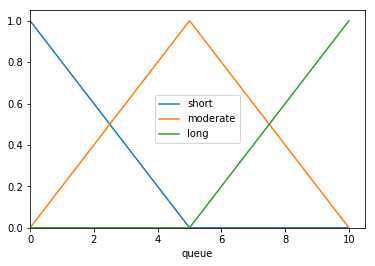

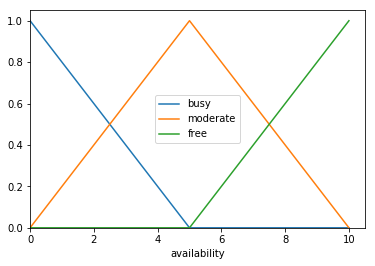

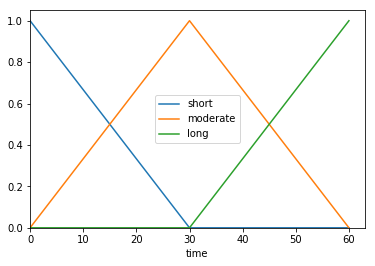

In [9]:
if __name__ == "__main__":
#     System name : Paitient waiting time estimation system
#     length_of_queue = queue
#     availability_of_doctor = availability
#     estimation_time = time (in min)

    # Define membership function
    plot_graph()
    
    # Define rules
    rules_list = []
    define_rules()
    
    # Get input Length of Queue(range from 1 - 10) & Doctors' Availability(range from 1 - 10)
    queue_input = 7
    availability_input = 7
    
    # Perform fuzzification and defuzzification
    print("\nEstimated Waiting Time: {0:.2f} minutes".format(round(calculate(queue_input,availability_input),2)))
    